In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import sklearn

# Data Pre Processing

In [2]:
df=pd.read_csv("insurence.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
373,26,male,32.900,2,yes,southwest,36085.21900
928,62,female,39.160,0,no,southeast,13470.80440
1160,43,female,34.580,1,no,northwest,7727.25320
1121,46,male,38.170,2,no,southeast,8347.16430
284,52,female,31.200,0,no,southwest,9625.92000
674,44,female,43.890,2,yes,southeast,46200.98510
1034,61,male,38.380,0,no,northwest,12950.07120
906,27,male,32.585,3,no,northeast,4846.92015
888,22,male,39.500,0,no,southwest,1682.59700
791,19,male,27.600,0,no,southwest,1252.40700


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.duplicated().sum()


1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

##### After removing duplicate we can check if there is any missing values in data set after dealing with data set we will deal with object column

In [8]:
df.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

## Exploratory Data Analysis

##### There is'nt any missing values so we can move foward,There are three objective Sex,Smoker and region column so what we can do is use sk-learn library of to perform one-hot encoding or use pandas dummies function since all of these columns are nominal we can'nt specify to encode everthing as one and zeroes to convet them into integer column

In [9]:
print(f"The Number of Unique values in Sex column is {df["sex"].nunique()} which is : {df["sex"].unique()}")
print(f"The Number of Unique values in Smoker column is {df["smoker"].nunique()} which is : {df["smoker"].unique()}")
print(f"The Number of Unique values in Region column is {df["region"].nunique()} which is : {df["region"].unique()}")

The Number of Unique values in Sex column is 2 which is : ['female' 'male']
The Number of Unique values in Smoker column is 2 which is : ['yes' 'no']
The Number of Unique values in Region column is 4 which is : ['southwest' 'southeast' 'northwest' 'northeast']


In [10]:
pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


# Encoding Started (df) was the column 

##### After encoding our columns will increase there will be 12 columns from 7 columns so we can use pandas and OneHotEncoder since our data set is small we can do is used get duumies of pandas function

In [11]:
df_encoded=pd.get_dummies(df, columns=['sex', 'smoker', 'region'],dtype=int,drop_first=True)

In [12]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [13]:
df_encoded.shape

(1337, 9)

##### Since there are outliers present after encoding, we also need to standardize our dataset. We will perform a technique of normalization known as robust scaling, which is particularly effective for datasets with outliers.

In [14]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [15]:
from sklearn.preprocessing import RobustScaler
Ro=RobustScaler()
df_scaled=Ro.fit_transform(df_encoded)

In [16]:
df_encoded_scaled=pd.DataFrame(df_scaled,columns=df_encoded.columns)

In [17]:
df_encoded_scaled.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297265,-0.5,0.629546,-1.0,1.0,0.0,0.0,1.0
1,-0.875000,0.400713,0.0,-0.643134,0.0,0.0,0.0,1.0,0.0
2,-0.458333,0.309156,1.0,-0.414453,0.0,0.0,0.0,1.0,0.0
3,-0.250000,-0.914982,-0.5,1.057671,0.0,0.0,1.0,0.0,0.0
4,-0.291667,-0.180737,-0.5,-0.463364,0.0,0.0,1.0,0.0,0.0


In [18]:
df_encoded_scaled.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,0.009256,0.031326,0.047868,0.326827,-0.495138,0.204936,0.242334,0.272251,0.243082
std,0.585181,0.725383,0.602786,1.016706,0.500163,0.403806,0.428655,0.445285,0.429104
min,-0.875000,-1.717004,-0.500000,-0.693815,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.488704,-0.500000,-0.389528,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.511296,0.500000,0.610472,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.041667,2.702735,2.000000,4.565743,0.000000,1.000000,1.000000,1.000000,1.000000


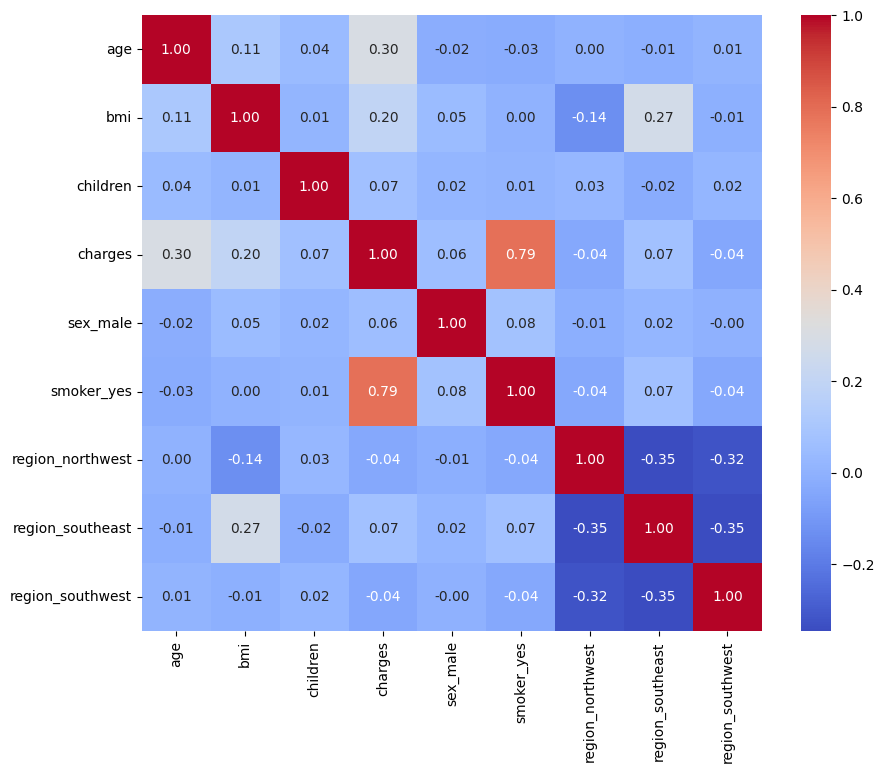

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded_scaled.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [20]:
df_encoded_scaled.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-0.833333,-0.297265,-0.5,0.629546,-1.0,1.0,0.0,0.0,1.0
1,-0.875000,0.400713,0.0,-0.643134,0.0,0.0,0.0,1.0,0.0
2,-0.458333,0.309156,1.0,-0.414453,0.0,0.0,0.0,1.0,0.0
3,-0.250000,-0.914982,-0.5,1.057671,0.0,0.0,1.0,0.0,0.0
4,-0.291667,-0.180737,-0.5,-0.463364,0.0,0.0,1.0,0.0,0.0


###### To avoid Multicollinearity i will be dropping one of the region columns because all three of them is showing a high corelation with each other and will check if my model behaves acuuretly after dropping the column

In [21]:
df_encoded_scaled_drop=df_encoded_scaled.drop("region_southwest",axis=1)

## Model Development

In [22]:
X = df_encoded_scaled_drop[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast']]
y = df_encoded_scaled_drop['charges']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [24]:
print("The shape of X train is ",X_train.shape)
print("The shape of X test is ",X_test.shape)

The shape of X train is  (1069, 7)
The shape of X test is  (268, 7)


In [25]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast
1113,-0.666667,-0.700357,-0.5,0.0,0.0,0.0,0.0
967,-0.750000,-0.553508,0.5,0.0,0.0,0.0,0.0
598,0.541667,0.847206,0.5,-1.0,0.0,1.0,0.0
170,1.000000,1.316290,-0.5,0.0,0.0,0.0,1.0
275,0.333333,-0.451843,0.5,-1.0,0.0,0.0,0.0


In [26]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast
899,0.416667,-0.937574,-0.5,0.0,0.0,0.0,0.0
1063,-0.416667,-0.570749,1.5,-1.0,0.0,0.0,0.0
1255,0.500000,0.711653,1.0,-1.0,0.0,1.0,0.0
298,-0.333333,0.474435,1.0,0.0,1.0,1.0,0.0
237,-0.333333,0.950059,0.5,0.0,0.0,0.0,1.0


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"R-squared (R2): {r2:.2%}")


Mean Squared Error (MSE): 0.25
R-squared (R2): 80.53%


##### This the model Accuracy of model based upon its is scaled using robust scaling 

## Model Interpretation
### Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')


In [34]:
mse_scores = -scores
print("Mean Squared Error for each fold:", mse_scores)
print("Average Mean Squared Error:", np.mean(mse_scores))


Mean Squared Error for each fold: [0.2605343  0.2688708  0.23225528 0.28170178 0.25984243]
Average Mean Squared Error: 0.2606409161330536


In [35]:
print("Standard Deviation of MSE across folds:", np.std(mse_scores))


Standard Deviation of MSE across folds: 0.016233818661756026


In [36]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coefficients_sorted = coefficients.sort_values(by="Coefficient")


In [37]:
coefficients_sorted

,Coefficient
region_southeast,-0.041098
sex_male,-0.007710
region_northwest,-0.004676
children,0.089746
bmi,0.222419
age,0.500364
smoker_yes,1.938694


smoker_yes (1.938694): Being a smoker is associated with an increase in medical charges by approximately 1.94 units (this unit depends on how our target variable is scaled, e.g., thousands of dollars) compared to non-smokers. This is the most significant positive influence on medical charges in our model, indicating that smoking status greatly impacts medical expenses.

age (0.500364): For each additional year of age, medical charges increase by about 0.50 units. Age is a significant factor in determining medical charges, with older individuals typically incurring higher charges.

bmi (0.222419): A one-unit increase in Body Mass Index (BMI) is associated with an increase in medical charges by approximately 0.22 units. This suggests that higher BMI, which is often linked to obesity and related health issues, can lead to higher medical expenses.

children (0.089746): Having an additional child is associated with an increase in medical charges by roughly 0.09 units. This coefficient is positive but smaller compared to factors like smoking and age, indicating a smaller, yet positive, impact on medical charges.

region_northwest (-0.004676): Being in the northwest region is associated with a slight decrease in medical charges by about 0.005 units compared to the baseline region (not shown here, likely the omitted region in your model). The negative sign indicates a decrease, but the magnitude is very small, suggesting a minimal impact.

sex_male (-0.007710): Being male is associated with a slight decrease in medical charges by approximately 0.008 units compared to females. The impact is negative but very small, suggesting gender has a minimal direct effect on medical charges in our model.

region_southeast (-0.041098): Being in the southeast region is associated with a decrease in medical charges by about 0.041 units compared to the baseline region. This is a negative impact, indicating that, all else equal, individuals in the southeast region might have slightly lower medical charges than those in the baseline region.

1. Smoking has the most significant positive effect on medical charges; smokers tend to pay much more.

2. Age and BMI also positively affect medical charges; as people get older or have higher BMI, their medical charges tend to increase.

3. Having children slightly increases medical charges.

4. Geographical region and gender have minor effects on medical charges, with some regions and being male associated with slight decreases in charges.

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
df_Min_Max_Scaled=scaler.fit_transform(df)

ValueError: could not convert string to float: 'female'

In [ ]:
df_min_max_scaled=pd.DataFrame(df_Min_Max_Scaled,columns=df.columns)

In [ ]:
df_min_max_scaled.head()

In [ ]:
X_Min_Max_Scaled=[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast']]
y_Min_Max_Scaled=["charges"]

In [ ]:
print(X_Min_Max_Scaled.shape)
print(y_Min_Max_Scaled.shape)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_Min_Max_Scaled,y_Min_Max_Scaled,test_size=0.2,random_state=1)

In [ ]:
X_Min_Max_Scaled.head()